# Lab 1: One-Dimensional Linear Regression (Batch Gradient Descent)

## Abstract
In this lab, we use one-dimensional linear regression as the example and solve for the parameters $\theta=(\theta_0,\theta_1)$ using batch gradient descent. On the given training set (age → height), we perform parameter estimation, draw the fitted line, make two point predictions, and visualize the cost function $J(\theta)$ with a 3D surface and contour plot to build intuition about the behavior and convergence of gradient descent.


## 1. Data and Preprocessing
The data files are located in `./ex1Data/`. Read age into a matrix $X\in\mathbb{R}^{m\times 1}$ and height into a vector $y\in\mathbb{R}^{m\times 1}$, and standardize both to column-vector shapes to facilitate subsequent matrix operations and vectorized implementation.


样本数 m = 50
X 预览（前 5 行）：
 [2.0658746 2.3684087 2.5399929 2.5420804 2.549079 ]
y 预览（前 5 行）：
 [0.77918926 0.91596757 0.90538354 0.90566138 0.9389889 ]


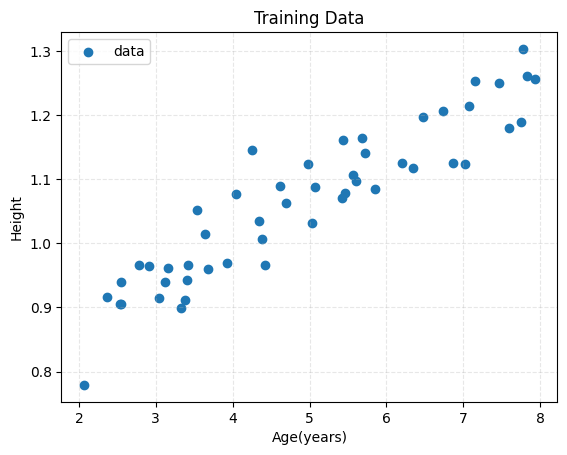

In [ ]:
import sys,os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

DATA_DIR=Path('ex1Data')
X_Path=DATA_DIR/'ex1x.dat'
y_Path=DATA_DIR/'ex1y.dat'
DATA_DIR.mkdir(parents=True,exist_ok=True)

X=np.loadtxt(X_Path,dtype=float).reshape(-1,1)
y=np.loadtxt(y_Path,dtype=float).reshape(-1,1)
m=X.shape[0]
print(f"样本数 m = {m}")
print("X 预览（前 5 行）：\n",X[:5].ravel())
print("y 预览（前 5 行）：\n",y[:5].ravel())

plt.figure()
plt.scatter(X,y,marker='o',label="data")
plt.xlabel("Age(years)")
plt.ylabel("Height")
plt.title("Training Data")
plt.grid(True,linestyle='--',alpha=0.3)
plt.legend()
plt.show()

## 2. Model and Objective
Under the linear model $h_\theta(x)=\theta_0+\theta_1 x$, we adopt the mean-squared-error (MSE) cost:

$$
J(\theta)=\frac{1}{2m}\sum_{i=1}^m\big(h_\theta(x^{(i)})-y^{(i)}\big)^2,
$$

and in implementation we obtain $X_b=[\mathbf{1},\,X]$ by concatenating a constant column to the feature matrix.


In [7]:
def add_intercept(X):
    if X.ndim==1:
        X=X.reshape(-1,1)
    ones=np.ones((X.shape[0],1),dtype=X.dtype)
    return np.hstack([ones,X])
def cost(X_b,y,theta):
    m=X_b.shape[0]
    res=X_b@theta-y
    return float((res**2).sum()/(2*m))
def gradient_descent(X,y,alpha=0.07,iters=1500):
    X_b=add_intercept(X)
    m=X_b.shape[0]
    theta=np.zeros((2, 1))
    J_hist=[]
    theta_after_first_iter=None
    for t in range(1,iters+1):
        res=X_b@theta-y
        grad=(X_b.T@res)/m
        theta=theta-alpha*grad
        J_hist.append(cost(X_b,y,theta))
        if t==1:
            theta_after_first_iter=theta.copy()
    return theta,np.array(J_hist),theta_after_first_iter
def predict(age, theta):
    x_b=np.array([[1.0,float(age)]],dtype=float)
    return (x_b@theta).item() 


## 3. Training Method (Batch Gradient Descent)
With learning rate $\alpha$, we iterate:

$
\theta := \theta-\alpha\,\nabla_\theta J(\theta),\quad
\nabla_\theta J(\theta)=\frac{1}{m}X_b^\top\!\big(X_b\theta-y\big).
$

By default we set $\alpha=0.07$, run 1,500 iterations, and record the parameters after the first update and after convergence.


第 1 次迭代后的参数: theta0=0.074528, theta1=0.380022
最终参数 (1500 次迭代): theta0=0.750150, theta1=0.063883
最终代价 J(theta) = 0.000987


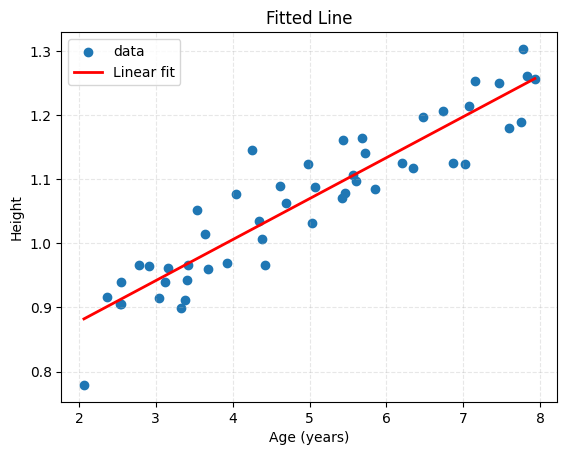

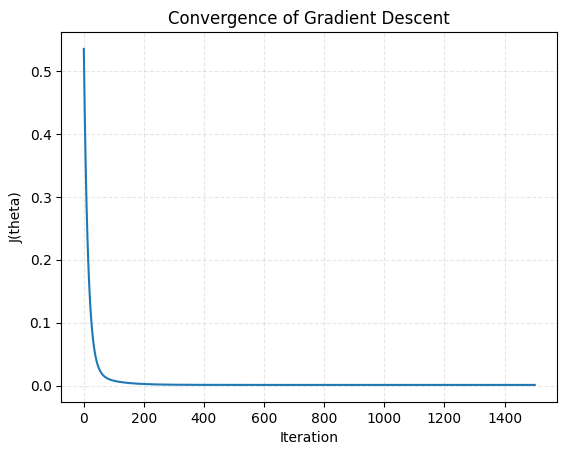

In [8]:
alpha=0.07
iters=1500
theta_final,J_hist,theta_first=gradient_descent(X,y,alpha=alpha,iters=iters)
print(f"第 1 次迭代后的参数: theta0={theta_first[0,0]:.6f}, theta1={theta_first[1,0]:.6f}")
print(f"最终参数 ({iters} 次迭代): theta0={theta_final[0,0]:.6f}, theta1={theta_final[1,0]:.6f}")
print(f"最终代价 J(theta) = {J_hist[-1]:.6f}")

X_line=np.linspace(float(X.min()),float(X.max()),100).reshape(-1,1)
y_line=add_intercept(X_line)@theta_final

plt.figure()
plt.scatter(X,y,marker='o',label="data")
plt.plot(X_line,y_line,color='red',linewidth=2.0,label="Linear fit")
plt.xlabel("Age (years)")
plt.ylabel("Height")
plt.title("Fitted Line")
plt.grid(True,linestyle='--',alpha=0.3)
plt.legend()
plt.show()

plt.figure()
plt.plot(np.arange(1,len(J_hist)+1),J_hist)
plt.xlabel("Iteration")
plt.ylabel("J(theta)")
plt.title("Convergence of Gradient Descent")
plt.grid(True,linestyle='--',alpha=0.3)
plt.show()


## 4. Experimental Results (Parameters and Fit)
The learned parameters $\theta_0,\theta_1$ are shown above. Together with the scatter plot, the **red** fitted line illustrates how well the linear model captures the trend in the data. The convergence curve, $J(\theta)$ vs. iterations, further demonstrates the monotonic decrease during training and the stability of convergence.


## 5. Prediction (Ages 3.5 and 7)
Use the trained linear model to complete the prediction tasks given in the handout.


In [9]:
pred_3_5=predict(3.5,theta_final)
pred_7_0=predict(7.0,theta_final)

print(f"预测：age=3.5, height≈ {pred_3_5:.4f}")
print(f"预测：age=7.0, height≈ {pred_7_0:.4f}")

预测：age=3.5, height≈ 0.9737
预测：age=7.0, height≈ 1.1973


## 6. 3D Surface and Contours of the Cost $J(\theta)$
Construct a grid with $\theta_0 \in [-3,3]$ and $\theta_1 \in [-1,1]$, compute $J(\theta)$ at each grid point, and mark the location of the obtained optimum on the plots.


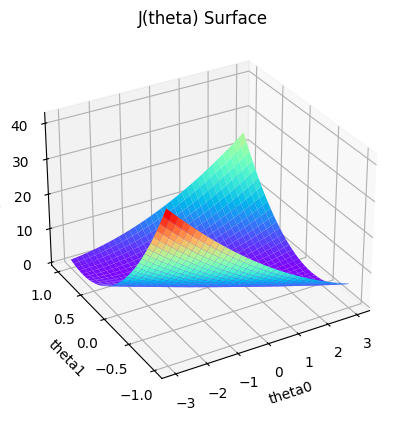

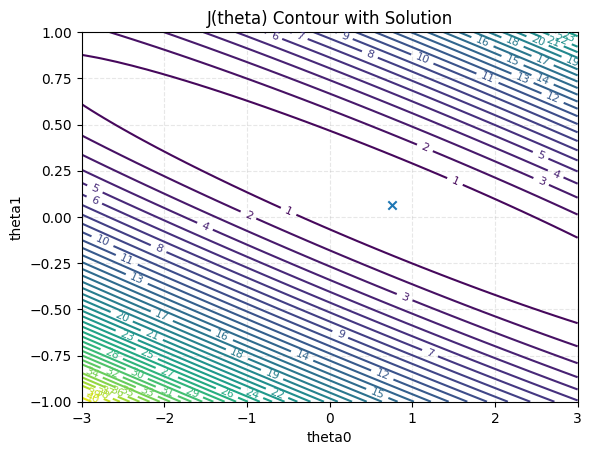

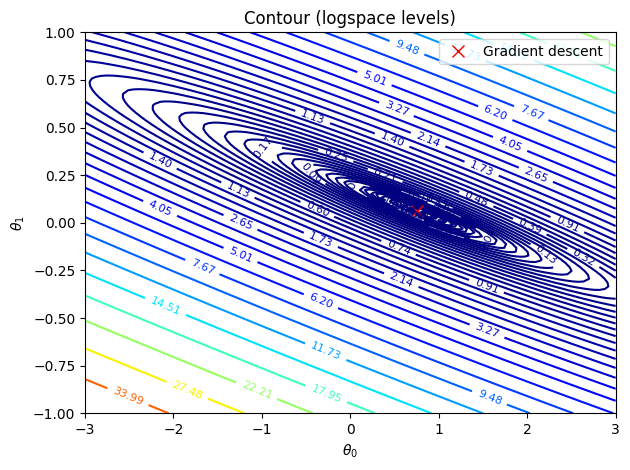

In [10]:
theta0_vals=np.linspace(-3,3,100)
theta1_vals=np.linspace(-1,1,100)
T0,T1=np.meshgrid(theta0_vals,theta1_vals)
X_b=add_intercept(X)
J_vals=np.zeros_like(T0)
for i in range(T0.shape[0]):
    for j in range(T0.shape[1]):
        th=np.array([[T0[i,j]],[T1[i,j]]])
        J_vals[i,j]=cost(X_b,y,th)

from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.plot_surface(T0,T1,J_vals,rstride=3,cstride=3,linewidth=0.2,antialiased=True,cmap='rainbow')
ax.view_init(elev=30,azim=-120)
ax.set_xlabel("theta0")
ax.set_ylabel("theta1")
ax.set_zlabel("J(theta)")
ax.set_title("J(theta) Surface")
plt.show()

plt.figure()
CS=plt.contour(T0, T1, J_vals, levels=50)
plt.clabel(CS,inline=True,fontsize=8)
plt.scatter([theta_final[0,0]],[theta_final[1,0]],marker='x')
plt.xlabel("theta0")
plt.ylabel("theta1")
plt.title("J(theta) Contour with Solution")
plt.grid(True,linestyle='--',alpha=0.3)
plt.show()

J=np.asarray(J_vals,float)
vmin=J[J>0].min()
vmax=J.max()
levels_log=np.geomspace(vmin, vmax, 50)
Z=np.clip(J,vmin,None)
plt.figure()
CS_log=plt.contour(theta0_vals,theta1_vals,Z,levels=levels_log,cmap='jet')
plt.clabel(CS_log,inline=True,fontsize=8)
plt.plot([theta_final[0,0]],[theta_final[1,0]],'rx',markersize=8,label='Gradient descent')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title("Contour (logspace levels)")
plt.legend(loc='upper right',frameon=True,fancybox=True)
plt.tight_layout()
plt.show()



## 7. Visualization and Discussion of the Cost Function
To build intuition about the behavior of gradient descent, construct a grid with $\theta_0\in[-3,3]$ and $\theta_1\in[-1,1]$ and compute $J(\theta)$:
- The **3D surface** shows the overall landscape of the cost function;
- The **contour plot** marks the gradient-descent solution (red “×”), which lies in the valley of the contours.

In this single-feature setting, the algorithm converges without feature scaling; however, in multi-feature problems, feature scaling can significantly speed up and stabilize convergence.

In addition, to better highlight details near the minimum (as suggested in the course handout), we add a **log-spaced contour plot**: logarithmically spaced contour levels allocate more emphasis to low-value regions, revealing the “valley floor” of $J(\theta)$ more clearly.
